# Ejercicio de **Clasificación Binaria**

Los modelos de clasificacion son modelos que buscan predecir si una observacion pertenece a un determinado grupo o a otro en funcion de sus características.

# Importamos las librerí­as

In [1]:
import numpy as np
import pandas as pd
import os

## Para regresión logística

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

## Para normalizar los datos

Documentación: https://scikit-learn.org/stable/modules/preprocessing.html

In [3]:
from sklearn import preprocessing

## Clasificador KNN

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

## Naive Bayes (con cross-validation)

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

## Árboles de decisión

In [1]:
# Importaciones para árboles de decisión
from sklearn import tree
from sklearn.tree import export_graphviz, export_text
from six import StringIO

# Opción 1: Con pydotplus (para visualización avanzada)
try:
    import pydotplus
    PYDOTPLUS_AVAILABLE = True
    print("✅ pydotplus disponible - Se pueden generar visualizaciones avanzadas")
except ImportError:
    PYDOTPLUS_AVAILABLE = False
    print("⚠️ pydotplus no disponible - Se usará visualización básica")

# Opción 2: Alternativa simple con matplotlib
import matplotlib.pyplot as plt

✅ pydotplus disponible - Se pueden generar visualizaciones avanzadas


## Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier

## XGBoost

In [3]:
import xgboost as xgb

## Gráficas personalizadas

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def cuadro_matriz_confusion(confusion):
    fig, ax = plt.subplots()

    labels = ['Verdadero Neg', 'Falso Pos', 'Falso Neg', 'Verdadero Pos']
    categories = ['0', '1']
    counts = ['{0:,}'.format(value) for value in confusion.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in confusion.flatten() / np.sum(confusion)]
    labels = [f'{label}\n{count}\n{percentage}' for label, count, percentage in zip(labels, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories, ax=ax)
    plt.xlabel('Valores predichos')
    plt.ylabel('Valores reales')
    plt.title('Matriz de confusión')
    plt.show()

## Métricas personalizadas

In [5]:
def resumen_metricas(confusion, y_test):
    # Calcular las tasas de precisión, sensibilidad, especificidad y valor predictivo positivo
    accuracy = (confusion[0, 0] + confusion[1, 1]) / len(y_test)
    recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])
    specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
    ppv = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])

    # Mostrar las tasas de precisión, sensibilidad, especificidad y valor predictivo positivo
    print("Precisión (Accuracy):", accuracy)
    print("Sensibilidad (Recall):", recall)
    print("Especificidad:", specificity)
    print("Valor Predictivo Positivo (PPV):", ppv)

# Carga de los datos:

In [8]:
import pandas as pd

data = pd.read_csv(r"C:\Users\Dell\PyhtonIA\Machine Learning\Clasificacion\heart_data.csv")

Para aplicar los modelos es necesario que todos los valores tengan un formato numérico
Para ello hacemos las siguientes transformaciones.

El primer paso es conocer nuestros datos.
Realizamos una primera visualizacion.

## Exploración y Análisis de los datos

In [76]:
data.head(n=10)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [9]:
# Realizamos un resumen estadistico de las variables.
descripcion_data = data.describe(include="all").T
descripcion_data

,count,mean,std,min,25%,50%,75%,max
index,70000.0,34999.500000,20207.403759,0.0,17499.75,34999.5,52499.25,69999.0
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0


In [10]:
# Comprobamos que no hay valores perdidos.
data.isnull().sum()

index          0
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [11]:
# Con esta funcion vemos si existen (TRUE) o no (FALSE) datos perdidos
data.isnull().any().any()

np.False_

## Balanceo de la columna objetivo

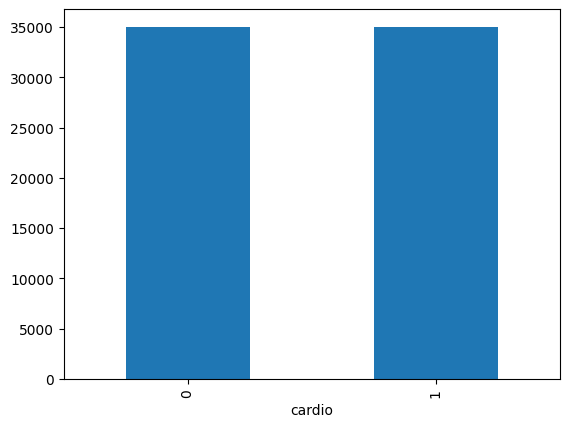

In [12]:
data["cardio"].value_counts().plot(kind = "bar");

In [13]:
# Tras comprobar que no existen valores perdidos analizamos las variables.
# El objetivo es determinar si todas las variables son utiles para la modelizacion.
# Hay una serie de variables que no nos proporcionan informacion.
# Eliminamos esas variables
del data['index']
del data['id']

In [14]:
# La variable "gender" toma valores 1 y 2. La reducimos en una unidad para que tome 0 y 1
data["gender"] = data["gender"] - 1

In [15]:
# Volvemos a visualizar los datos.
data.head(n=10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,1,168,62.0,110,80,1,1,0,0,1,0
1,20228,0,156,85.0,140,90,3,1,0,0,1,1
2,18857,0,165,64.0,130,70,3,1,0,0,0,1
3,17623,1,169,82.0,150,100,1,1,0,0,1,1
4,17474,0,156,56.0,100,60,1,1,0,0,0,0
5,21914,0,151,67.0,120,80,2,2,0,0,0,0
6,22113,0,157,93.0,130,80,3,1,0,0,1,0
7,22584,1,178,95.0,130,90,3,3,0,0,1,1
8,17668,0,158,71.0,110,70,1,1,0,0,1,0
9,19834,0,164,68.0,110,60,1,1,0,0,0,0


Vemos los valores únicos de las columnas categóricas (Las que tienen menos de, por ejemplo, 15 valores únicos)

In [16]:
for columna in data.columns:
    if len(data[columna].unique()) < 15:
        print(f"Columna {columna} -> Valores únicos {data[columna].unique()}")

Columna gender -> Valores únicos [1 0]
Columna cholesterol -> Valores únicos [1 3 2]
Columna gluc -> Valores únicos [1 2 3]
Columna smoke -> Valores únicos [0 1]
Columna alco -> Valores únicos [0 1]
Columna active -> Valores únicos [1 0]
Columna cardio -> Valores únicos [0 1]


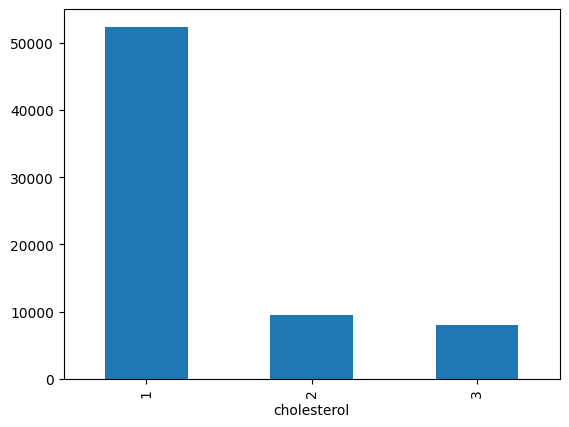

In [17]:
data['cholesterol'].value_counts().plot(kind = "bar");
# Cambio posible
# data['cholesterol'] = data['cholesterol'] != 1

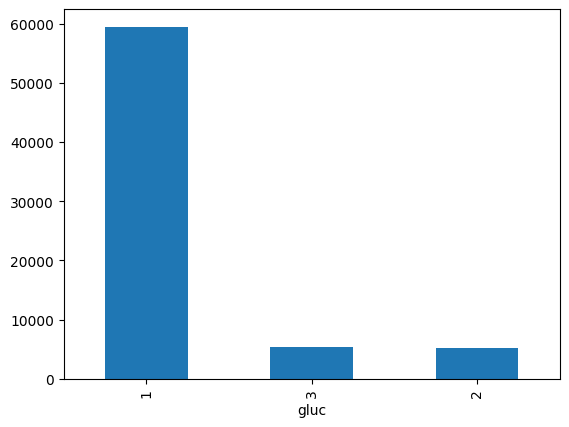

In [18]:
data['gluc'].value_counts().plot(kind = "bar");
# Cambio posible
# data['gluc'] = data['gluc'] != 1

Posteriormente podemos considerar la opción de dumificar o no las columnas `cholesterol`y `gluc`

Ya no hacemos más limpieza en este caso. En este punto lo consideramos "datosfinal"

In [19]:
datos_final = data

## Outliers

### Presión alta

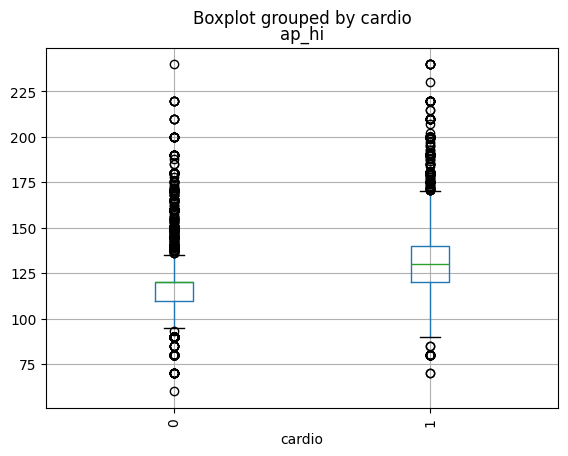

In [20]:
data = data[(data["ap_hi"]<300) & (data["ap_hi"]>50)]
data.boxplot(column="ap_hi", by="cardio", ax=None, fontsize=None, rot=90, grid=True);


### Presión baja

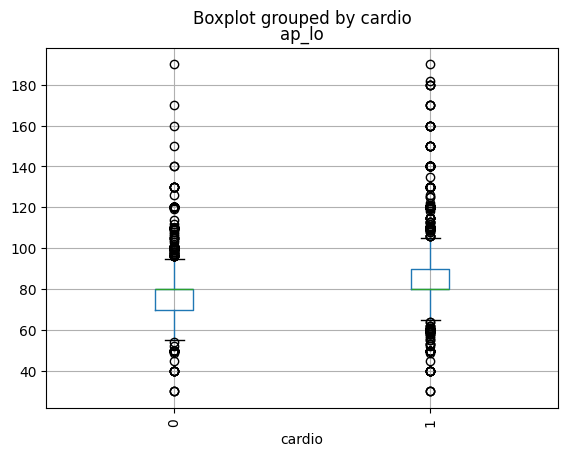

In [21]:
data = data[(data["ap_lo"]<250) & (data["ap_lo"]>25)]
data.boxplot(column="ap_lo", by="cardio", ax=None, fontsize=None, rot=90, grid=True);

In [22]:
data['ap_lo'].value_counts().head(20)

ap_lo
80     34736
90     14269
70     10218
100     4077
60      2716
110      398
79       357
85       290
75       210
120      204
95       161
89       122
69       100
65        78
50        56
130       35
82        33
84        32
83        30
140       30
Name: count, dtype: int64

<Axes: title={'center': 'Distribucion de la Tensión arterial'}, ylabel='Density'>

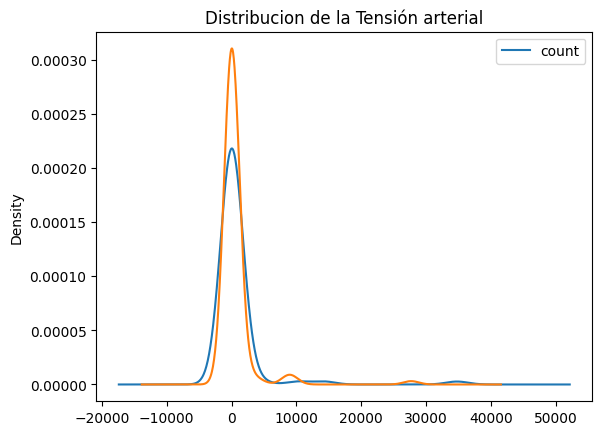

In [24]:
data['ap_lo'].value_counts().sort_index().plot(x='Presión arterial baja',y='frecuencia',
                                           kind='kde', legend=True,title='Distribucion de la Tensión arterial')
data['ap_hi'].value_counts().sort_index().plot(x='Presión arterial alta',y='frecuencia',
                                           kind='kde')

### Alturas Anómalas

Vemos que las personas con altura menor de 125cm tienen pesos exagerados para esa altura. Probablemente se trate de errores en los datos.

In [25]:
data.loc[data["height"]<125, ["height", "weight"]]

,height,weight
224,76,55.0
3420,100,70.0
3735,120,70.0
3752,120,30.0
4212,120,80.0
...,...,...
65302,99,60.0
66023,120,80.0
66479,110,90.0
66643,57,61.0


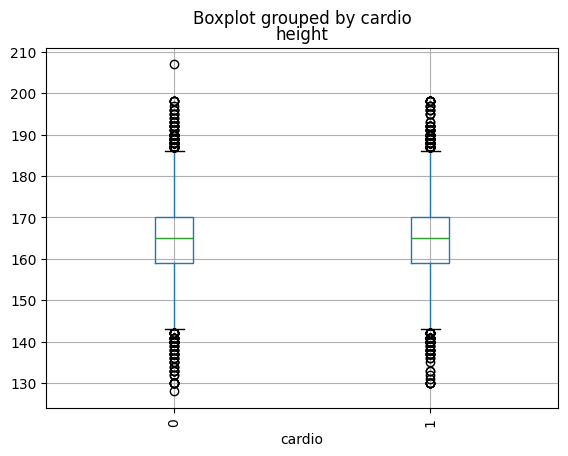

In [26]:
data = data[(data["height"]<220) & (data["height"]>125)]
data.boxplot(column="height", by="cardio", ax=None, fontsize=None, rot=90, grid=True);

### Body Mass Index anómalos

In [27]:
data["BMI"] = (10000 * data["weight"]) / (data["height"] **2)

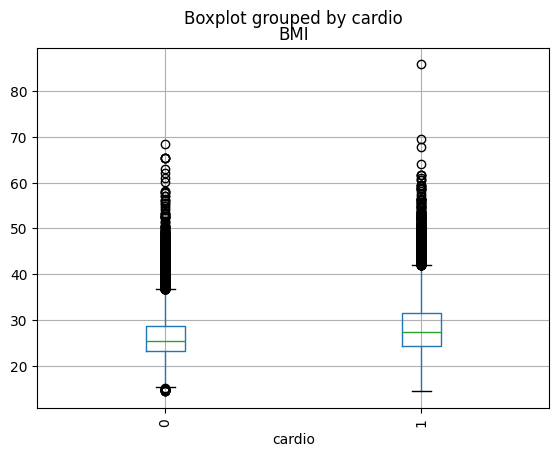

In [95]:
#data = data[data["BMI"]<90]
data = data[data["BMI"]>14]
data.boxplot(column="BMI", by="cardio", ax=None, fontsize=None, rot=90, grid=True);

In [28]:
max(data['BMI'])

85.77974319356386

Text(0, 0.5, 'Frecuencia')

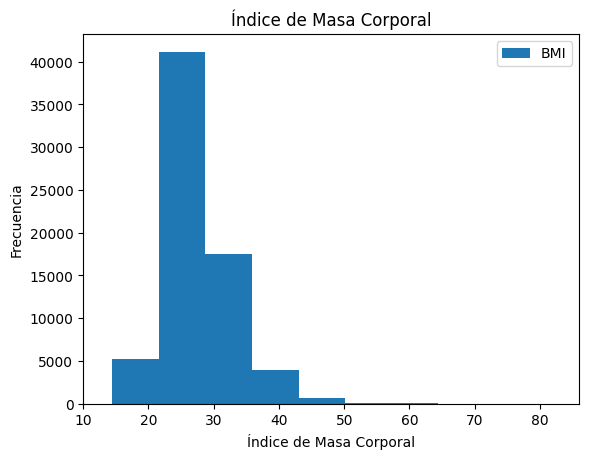

In [97]:
data['BMI'].plot(kind='hist', legend=True, title='Índice de Masa Corporal')

# Ajusta los límites del eje X
plt.xlim(10, 86)

# Configura etiquetas y muestra el gráfico
plt.xlabel('Índice de Masa Corporal')
plt.ylabel('Frecuencia')

In [29]:
data.loc[data["weight"]<40, ["height", "weight", "age", "BMI"]]

,height,weight,age,BMI
5794,151,37.00,17663,16.227358
10447,162,38.00,22007,14.479500
10627,153,37.00,21669,15.805887
11876,157,39.00,17512,15.822143
14722,143,34.00,22663,16.626730
16322,165,35.00,21872,12.855831
16906,170,31.00,17272,10.726644
18559,160,30.00,18140,11.718750
19582,152,38.00,21334,16.447368
22016,146,32.00,15359,15.012197


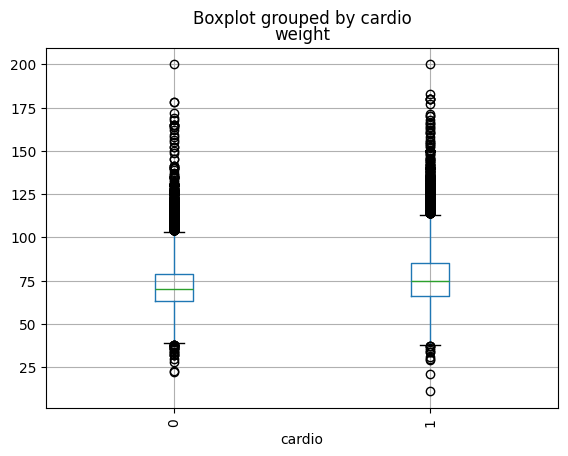

In [30]:
data.boxplot(column="weight", by="cardio", ax=None, fontsize=None, rot=90, grid=True);


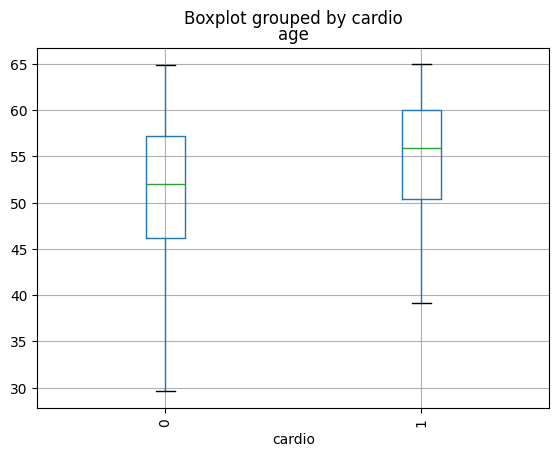

In [31]:
data2 = data
data2["age"] = data2["age"]/365
data2.boxplot(column="age", by="cardio", ax=None, fontsize=None, rot=90, grid=True);

In [32]:
datos_final = data

In [102]:
datos_final = datos_final.reset_index()
datos_final.index

RangeIndex(start=0, stop=68682, step=1)

# Correlación

In [33]:
datos_final.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI'],
      dtype='object')

In [47]:
# Verificar las columnas actuales de datos_final
print("Columnas actuales de datos_final:")
print(datos_final.columns.tolist())
print("\nForma del DataFrame:", datos_final.shape)

Columnas actuales de datos_final:
['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI']

Forma del DataFrame: (68693, 13)


In [48]:
# Preparar datos para KNN - eliminando columnas innecesarias de forma segura
datos_knn = datos_final.copy()

# Eliminar columnas de forma segura (solo si existen)
columnas_a_eliminar = ['index', 'weight', 'height', 'ap_lo']
for col in columnas_a_eliminar:
    if col in datos_knn.columns:
        datos_knn = datos_knn.drop(columns=col)
        print(f"Columna '{col}' eliminada")
    else:
        print(f"Columna '{col}' no encontrada, continuando...")

print(f"\nColumnas finales para KNN: {datos_knn.columns.tolist()}")
print(f"Forma del DataFrame: {datos_knn.shape}")

# Separar características y variable objetivo
X_knn = datos_knn.drop('cardio', axis=1)
y_knn = datos_knn['cardio']

# Dividir datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

# Normalizar los datos para KNN
from sklearn.preprocessing import StandardScaler
scaler_knn = StandardScaler()
X_train_knn_scaled = scaler_knn.fit_transform(X_train_knn)
X_test_knn_scaled = scaler_knn.transform(X_test_knn)

# Crear y entrenar el modelo KNN
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_knn_scaled, y_train_knn)

# Hacer predicciones
y_pred_knn = modelo_knn.predict(X_test_knn_scaled)

# Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_knn = accuracy_score(y_test_knn, y_pred_knn)
print(f"\nPrecisión del modelo KNN: {accuracy_knn:.4f}")

# Reporte de clasificación
print("\nReporte de clasificación KNN:")
print(classification_report(y_test_knn, y_pred_knn))

# Matriz de confusión
confusion_knn = confusion_matrix(y_test_knn, y_pred_knn)
print("\nMatriz de confusión KNN:")
print(confusion_knn)

Columna 'index' no encontrada, continuando...
Columna 'weight' eliminada
Columna 'height' eliminada
Columna 'ap_lo' eliminada

Columnas finales para KNN: ['age', 'gender', 'ap_hi', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI']
Forma del DataFrame: (68693, 10)

Precisión del modelo KNN: 0.6965

Reporte de clasificación KNN:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      6944
           1       0.70      0.68      0.69      6795

    accuracy                           0.70     13739
   macro avg       0.70      0.70      0.70     13739
weighted avg       0.70      0.70      0.70     13739


Matriz de confusión KNN:
[[4981 1963]
 [2207 4588]]

Precisión del modelo KNN: 0.6965

Reporte de clasificación KNN:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      6944
           1       0.70      0.68      0.69      6795

    accuracy                           0.70  

<Axes: >

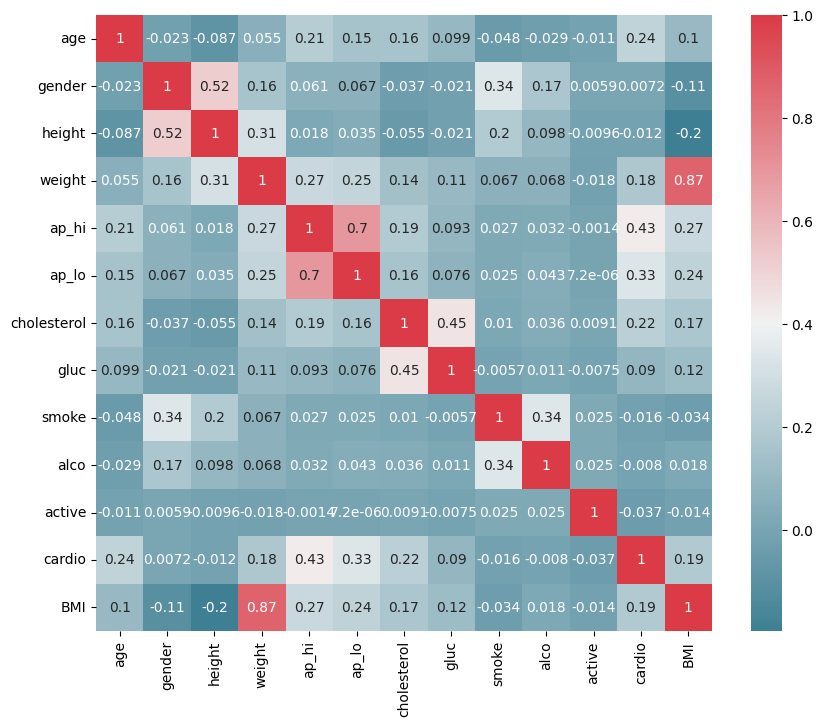

In [35]:
import numpy as np

f, ax = plt.subplots(figsize=(10, 8))
corr = datos_final.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

## Separación Train - Test

Vamos a preparar los datos para entrenar y evaluar los modelos utilizando la biblioteca scikit-learn (sklearn) en Python.

Aquí es lo que está haciendo cada línea:

La función `train_test_split` se utiliza para dividir los datos en conjuntos de entrenamiento y prueba de manera aleatoria.

Podría ser que las condiciones de medida de los registros de mi dataset fueran distintos en la parte baja de la tabla a las condiciones en la parte alta.

Por ello es conveniente "barajar" aleatoriamente las filas.

`random_state=42`: establece una semilla aleatoria para garantizar la reproducibilidad de la división de los datos

In [37]:
from sklearn.model_selection import train_test_split
y = datos_final['cardio']
X = datos_final.drop('cardio', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
# 🔧 VERIFICACIÓN E IMPORTACIÓN DE LIBRERÍAS NECESARIAS
print("="*60)
print("🔧 VERIFICANDO E IMPORTANDO LIBRERÍAS NECESARIAS")
print("="*60)

# Importaciones básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importaciones de sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_text

# Importación de XGBoost
import xgboost as xgb

# Verificar que las funciones personalizadas estén definidas
try:
    # Redefinir función de matriz de confusión si no existe
    def cuadro_matriz_confusion(confusion):
        fig, ax = plt.subplots()
        labels = ['Verdadero Neg', 'Falso Pos', 'Falso Neg', 'Verdadero Pos']
        categories = ['0', '1']
        counts = ['{0:,}'.format(value) for value in confusion.flatten()]
        percentages = ['{0:.2%}'.format(value) for value in confusion.flatten() / np.sum(confusion)]
        labels = [f'{label}\n{count}\n{percentage}' for label, count, percentage in zip(labels, counts, percentages)]
        labels = np.asarray(labels).reshape(2, 2)
        sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories, ax=ax)
        plt.xlabel('Valores predichos')
        plt.ylabel('Valores reales')
        plt.title('Matriz de confusión')
        plt.show()
    
    # Redefinir función de métricas si no existe
    def resumen_metricas(confusion, y_test):
        accuracy = (confusion[0, 0] + confusion[1, 1]) / len(y_test)
        recall = confusion[1, 1] / (confusion[1, 1] + confusion[1, 0])
        specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])
        ppv = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])
        print("Precisión (Accuracy):", accuracy)
        print("Sensibilidad (Recall):", recall)
        print("Especificidad:", specificity)
        print("Valor Predictivo Positivo (PPV):", ppv)
    
    print("✅ Funciones personalizadas definidas")
except:
    print("⚠️ Error al definir funciones personalizadas")

# Verificar que las variables de datos existan
try:
    print(f"✅ X_train shape: {X_train.shape}")
    print(f"✅ X_test shape: {X_test.shape}")
    print(f"✅ y_train shape: {y_train.shape}")
    print(f"✅ y_test shape: {y_test.shape}")
except NameError:
    print("❌ Las variables de entrenamiento y prueba no están definidas.")
    print("⚠️ Debes ejecutar las celdas de preparación de datos primero.")

print("\n🚀 Todas las librerías importadas correctamente. Listo para entrenar modelos!")
print("="*60)

🔧 VERIFICANDO E IMPORTANDO LIBRERÍAS NECESARIAS
✅ Funciones personalizadas definidas
✅ X_train shape: (51519, 12)
✅ X_test shape: (17174, 12)
✅ y_train shape: (51519,)
✅ y_test shape: (17174,)

🚀 Todas las librerías importadas correctamente. Listo para entrenar modelos!


#   Regresión Logística

El primer modelo de calsificacion es la regresion logistica. Este modelo es una regresion que mide la probabilidad de que una observacion tome el valor 0 o 1. (Verdadero o falso, acierto o error...)

🔴 ENTRENANDO MODELO DE REGRESIÓN LOGÍSTICA
✅ Modelo de Regresión Logística entrenado
Precisión del modelo: 0.7250

Matriz de Confusión - Regresión Logística:
✅ Modelo de Regresión Logística entrenado
Precisión del modelo: 0.7250

Matriz de Confusión - Regresión Logística:


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


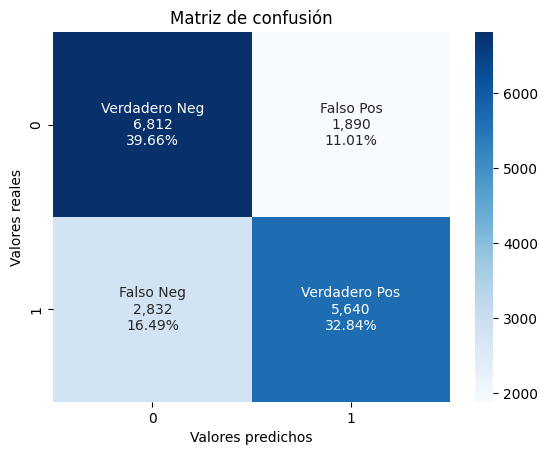


📊 MÉTRICAS DETALLADAS - REGRESIÓN LOGÍSTICA:
Precisión (Accuracy): 0.7250494934202865
Sensibilidad (Recall): 0.6657223796033994
Especificidad: 0.7828085497586762
Valor Predictivo Positivo (PPV): 0.749003984063745


In [41]:
# 🔴 MODELO 1: REGRESIÓN LOGÍSTICA
print("="*60)
print("🔴 ENTRENANDO MODELO DE REGRESIÓN LOGÍSTICA")
print("="*60)

# Crear el modelo de regresión logística
modelo_logistico = LogisticRegression(random_state=42, max_iter=1000)

# Entrenar el modelo
modelo_logistico.fit(X_train, y_train)

# Realizar predicciones
y_pred_logistico = modelo_logistico.predict(X_test)

# Calcular la matriz de confusión
confusion_logistico = confusion_matrix(y_test, y_pred_logistico)

print("✅ Modelo de Regresión Logística entrenado")
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred_logistico):.4f}")
print()

# Mostrar matriz de confusión
print("Matriz de Confusión - Regresión Logística:")
cuadro_matriz_confusion(confusion_logistico)

# Mostrar métricas detalladas
print("\n📊 MÉTRICAS DETALLADAS - REGRESIÓN LOGÍSTICA:")
resumen_metricas(confusion_logistico, y_test)

# K Nearest Neighbours

In [ ]:
# 🔵 MODELO 2: K-NEAREST NEIGHBORS (KNN)
print("="*60)
print("🔵 ENTRENANDO MODELO K-NEAREST NEIGHBORS")
print("="*60)

# Crear el modelo KNN con k=5 vecinos
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
modelo_knn.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = modelo_knn.predict(X_test)

# Calcular la matriz de confusión
confusion_knn = confusion_matrix(y_test, y_pred_knn)

print("✅ Modelo K-Nearest Neighbors entrenado")
print(f"Número de vecinos (k): {modelo_knn.n_neighbors}")
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred_knn):.4f}")
print()

# Mostrar matriz de confusión
print("Matriz de Confusión - K-Nearest Neighbors:")
cuadro_matriz_confusion(confusion_knn)

# Mostrar métricas detalladas
print("\n📊 MÉTRICAS DETALLADAS - K-NEAREST NEIGHBORS:")
resumen_metricas(confusion_knn, y_test)

# Naïve Bayes

🟡 ENTRENANDO MODELO NAÏVE BAYES
✅ Modelo Naïve Bayes entrenado
Precisión del modelo: 0.7029

🔄 VALIDACIÓN CRUZADA (5-Fold):
Puntuaciones CV: [0.70623059 0.70982143 0.70797748 0.70768634 0.69931088]
Precisión promedio CV: 0.7062 (+/- 0.0073)

Matriz de Confusión - Naïve Bayes:


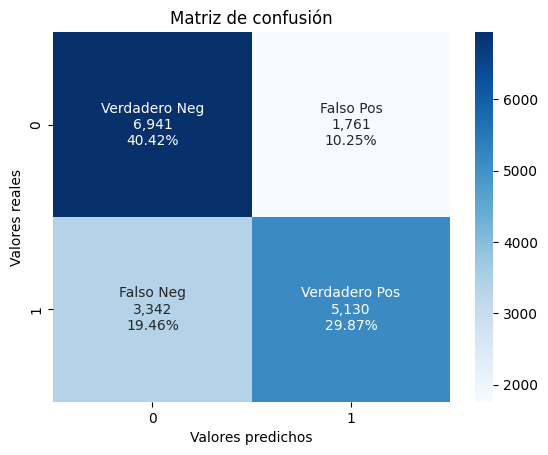


📊 MÉTRICAS DETALLADAS - NAÏVE BAYES:
Precisión (Accuracy): 0.702864795621288
Sensibilidad (Recall): 0.6055240793201133
Especificidad: 0.7976327281084808
Valor Predictivo Positivo (PPV): 0.7444492816717457


In [42]:
# 🟡 MODELO 3: NAÏVE BAYES
print("="*60)
print("🟡 ENTRENANDO MODELO NAÏVE BAYES")
print("="*60)

# Crear el modelo Naïve Bayes
modelo_nb = GaussianNB()

# Entrenar el modelo
modelo_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred_nb = modelo_nb.predict(X_test)

# Calcular la matriz de confusión
confusion_nb = confusion_matrix(y_test, y_pred_nb)

print("✅ Modelo Naïve Bayes entrenado")
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred_nb):.4f}")

# Validación cruzada (Cross-Validation)
print("\n🔄 VALIDACIÓN CRUZADA (5-Fold):")
cv_scores = cross_val_score(modelo_nb, X_train, y_train, cv=5)
print(f"Puntuaciones CV: {cv_scores}")
print(f"Precisión promedio CV: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print()

# Mostrar matriz de confusión
print("Matriz de Confusión - Naïve Bayes:")
cuadro_matriz_confusion(confusion_nb)

# Mostrar métricas detalladas
print("\n📊 MÉTRICAS DETALLADAS - NAÏVE BAYES:")
resumen_metricas(confusion_nb, y_test)

# Árbol de decisión

🟢 ENTRENANDO MODELO ÁRBOL DE DECISIÓN
✅ Modelo Árbol de Decisión entrenado
Profundidad del árbol: 5
Número de hojas: 31
Precisión del modelo: 0.7289

Matriz de Confusión - Árbol de Decisión:


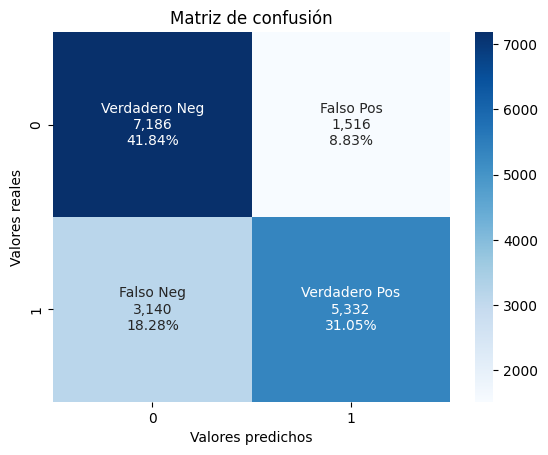


📊 MÉTRICAS DETALLADAS - ÁRBOL DE DECISIÓN:
Precisión (Accuracy): 0.7288925119366484
Sensibilidad (Recall): 0.6293673276676109
Especificidad: 0.8257871753619858
Valor Predictivo Positivo (PPV): 0.7786214953271028

🌳 IMPORTANCIA DE LAS CARACTERÍSTICAS:
   Característica  Importancia
4           ap_hi     0.786079
0             age     0.120672
6     cholesterol     0.075008
7            gluc     0.005786
11            BMI     0.004886
5           ap_lo     0.004649
10         active     0.001465
2          height     0.000796
8           smoke     0.000659
1          gender     0.000000

📄 ESTRUCTURA DEL ÁRBOL (primeras reglas):
|--- ap_hi <= 129.50
|   |--- age <= 54.65
|   |   |--- cholesterol <= 2.50
|   |   |   |--- age <= 44.11
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- age >  44.11
|   |   |   |   |--- truncated branch of depth 2
|   |   |--- cholesterol >  2.50
|   |   |   |--- gluc <= 2.50
|   |   |   |   |--- truncated branch of depth 2
|   |   |   |--- g

In [43]:
# 🟢 MODELO 4: ÁRBOL DE DECISIÓN
print("="*60)
print("🟢 ENTRENANDO MODELO ÁRBOL DE DECISIÓN")
print("="*60)

# Crear el modelo de árbol de decisión
modelo_arbol = tree.DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # Limitamos la profundidad para evitar overfitting
    min_samples_split=20,
    min_samples_leaf=10
)

# Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

# Realizar predicciones
y_pred_arbol = modelo_arbol.predict(X_test)

# Calcular la matriz de confusión
confusion_arbol = confusion_matrix(y_test, y_pred_arbol)

print("✅ Modelo Árbol de Decisión entrenado")
print(f"Profundidad del árbol: {modelo_arbol.get_depth()}")
print(f"Número de hojas: {modelo_arbol.get_n_leaves()}")
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred_arbol):.4f}")
print()

# Mostrar matriz de confusión
print("Matriz de Confusión - Árbol de Decisión:")
cuadro_matriz_confusion(confusion_arbol)

# Mostrar métricas detalladas
print("\n📊 MÉTRICAS DETALLADAS - ÁRBOL DE DECISIÓN:")
resumen_metricas(confusion_arbol, y_test)

# Mostrar importancia de las características
print("\n🌳 IMPORTANCIA DE LAS CARACTERÍSTICAS:")
feature_importance = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': modelo_arbol.feature_importances_
}).sort_values('Importancia', ascending=False)

print(feature_importance.head(10))

# Visualización simple del árbol (texto)
print("\n📄 ESTRUCTURA DEL ÁRBOL (primeras reglas):")
tree_rules = export_text(modelo_arbol, feature_names=list(X.columns), max_depth=3)
print(tree_rules[:1000] + "..." if len(tree_rules) > 1000 else tree_rules)

# XGBoost

🟣 ENTRENANDO MODELO XGBOOST
✅ Modelo XGBoost entrenado
Número de estimadores: 100
Profundidad máxima: 6
Precisión del modelo: 0.7337

Matriz de Confusión - XGBoost:
✅ Modelo XGBoost entrenado
Número de estimadores: 100
Profundidad máxima: 6
Precisión del modelo: 0.7337

Matriz de Confusión - XGBoost:


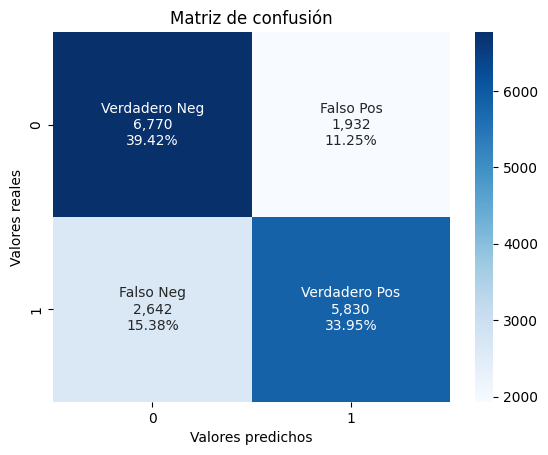


📊 MÉTRICAS DETALLADAS - XGBOOST:
Precisión (Accuracy): 0.7336671713054618
Sensibilidad (Recall): 0.6881491973559962
Especificidad: 0.7779820730866468
Valor Predictivo Positivo (PPV): 0.7510950785879927

🚀 IMPORTANCIA DE LAS CARACTERÍSTICAS (XGBoost):
   Característica  Importancia
4           ap_hi     0.606396
6     cholesterol     0.137289
0             age     0.057939
10         active     0.032001
8           smoke     0.026847
9            alco     0.024042
7            gluc     0.023210
5           ap_lo     0.022844
11            BMI     0.019903
3          weight     0.018975


In [44]:
# 🟣 MODELO 5: XGBOOST
print("="*60)
print("🟣 ENTRENANDO MODELO XGBOOST")
print("="*60)

# Crear el modelo XGBoost
modelo_xgb = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    eval_metric='logloss'  # Para evitar warnings
)

# Entrenar el modelo
modelo_xgb.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = modelo_xgb.predict(X_test)

# Calcular la matriz de confusión
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)

print("✅ Modelo XGBoost entrenado")
print(f"Número de estimadores: {modelo_xgb.n_estimators}")
print(f"Profundidad máxima: {modelo_xgb.max_depth}")
print(f"Precisión del modelo: {accuracy_score(y_test, y_pred_xgb):.4f}")
print()

# Mostrar matriz de confusión
print("Matriz de Confusión - XGBoost:")
cuadro_matriz_confusion(confusion_xgb)

# Mostrar métricas detalladas
print("\n📊 MÉTRICAS DETALLADAS - XGBOOST:")
resumen_metricas(confusion_xgb, y_test)

# Mostrar importancia de las características
print("\n🚀 IMPORTANCIA DE LAS CARACTERÍSTICAS (XGBoost):")
feature_importance_xgb = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': modelo_xgb.feature_importances_
}).sort_values('Importancia', ascending=False)

print(feature_importance_xgb.head(10))

# 📊 Comparación Final de Modelos

📊 RESUMEN COMPARATIVO DE MODELOS DE CLASIFICACIÓN

📋 TABLA COMPARATIVA DE RENDIMIENTO:
             Modelo  Accuracy  Precision  Recall (Sensitivity)  Specificity  F1-Score
Regresión Logística    0.7250     0.7490                0.6657       0.7828    0.7049
K-Nearest Neighbors    0.6933     0.6940                0.6767       0.7095    0.6852
        Naïve Bayes    0.7029     0.7444                0.6055       0.7976    0.6678
  Árbol de Decisión    0.7289     0.7786                0.6294       0.8258    0.6961
            XGBoost    0.7337     0.7511                0.6881       0.7780    0.7182

🏆 MEJOR MODELO: XGBoost
🎯 MEJOR ACCURACY: 0.7337 (73.37%)


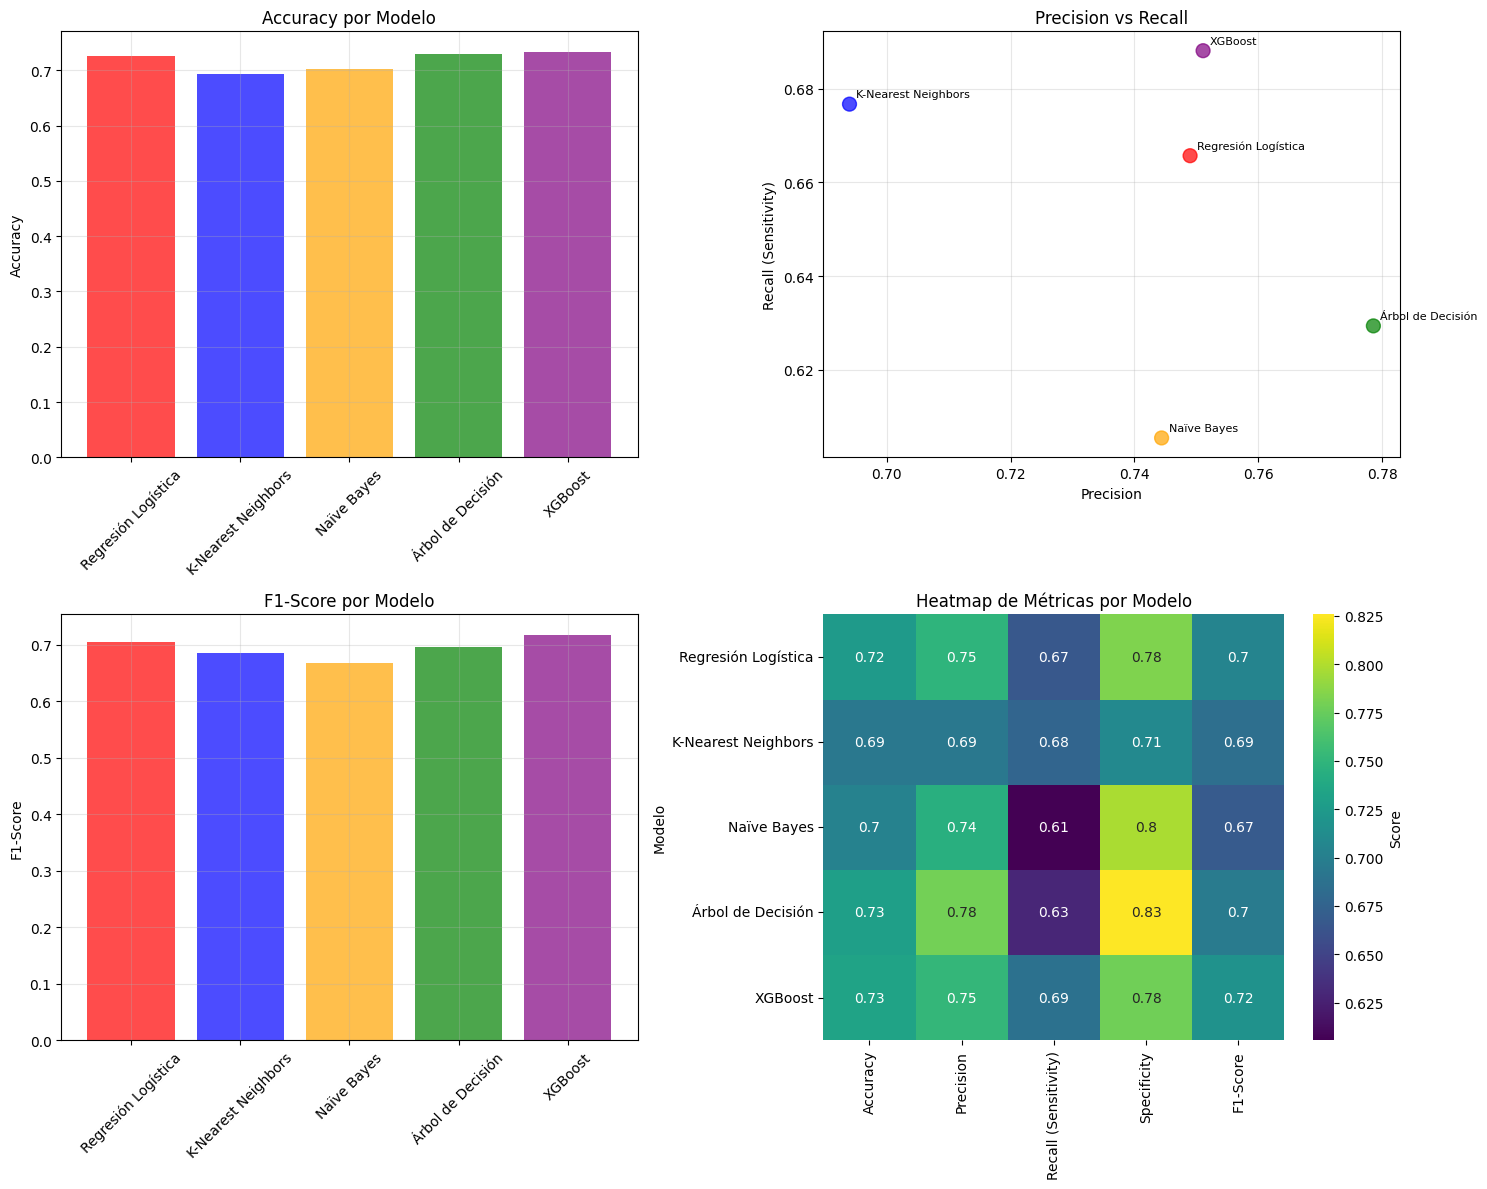


✅ ANÁLISIS COMPLETO DE CLASIFICACIÓN TERMINADO


In [52]:
# 📊 COMPARACIÓN FINAL DE TODOS LOS MODELOS
print("="*80)
print("📊 RESUMEN COMPARATIVO DE MODELOS DE CLASIFICACIÓN")
print("="*80)

# Calcular métricas para todos los modelos
modelos = {
    'Regresión Logística': y_pred_logistico,
    'K-Nearest Neighbors': y_pred_knn,
    'Naïve Bayes': y_pred_nb,
    'Árbol de Decisión': y_pred_arbol,
    'XGBoost': y_pred_xgb
}

# Crear DataFrame comparativo
resultados = []
for nombre, predicciones in modelos.items():
    conf_matrix = confusion_matrix(y_test, predicciones)
    tn, fp, fn, tp = conf_matrix.ravel()
    
    accuracy = (tp + tn) / len(y_test)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    resultados.append({
        'Modelo': nombre,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall (Sensitivity)': recall,
        'Specificity': specificity,
        'F1-Score': f1_score
    })

df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.round(4)

# Mostrar tabla comparativa
print("\n📋 TABLA COMPARATIVA DE RENDIMIENTO:")
print(df_resultados.to_string(index=False))

# Encontrar el mejor modelo
mejor_modelo = df_resultados.loc[df_resultados['Accuracy'].idxmax(), 'Modelo']
mejor_accuracy = df_resultados['Accuracy'].max()

print(f"\n🏆 MEJOR MODELO: {mejor_modelo}")
print(f"🎯 MEJOR ACCURACY: {mejor_accuracy:.4f} ({mejor_accuracy*100:.2f}%)")

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gráfico 1: Accuracy por modelo
axes[0,0].bar(df_resultados['Modelo'], df_resultados['Accuracy'], 
              color=['red', 'blue', 'orange', 'green', 'purple'], alpha=0.7)
axes[0,0].set_title('Accuracy por Modelo')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Precision vs Recall
axes[0,1].scatter(df_resultados['Precision'], df_resultados['Recall (Sensitivity)'], 
                  s=100, c=['red', 'blue', 'orange', 'green', 'purple'], alpha=0.7)
for i, modelo in enumerate(df_resultados['Modelo']):
    axes[0,1].annotate(modelo, (df_resultados['Precision'][i], df_resultados['Recall (Sensitivity)'][i]),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[0,1].set_xlabel('Precision')
axes[0,1].set_ylabel('Recall (Sensitivity)')
axes[0,1].set_title('Precision vs Recall')
axes[0,1].grid(True, alpha=0.3)

# Gráfico 3: F1-Score por modelo
axes[1,0].bar(df_resultados['Modelo'], df_resultados['F1-Score'], 
              color=['red', 'blue', 'orange', 'green', 'purple'], alpha=0.7)
axes[1,0].set_title('F1-Score por Modelo')
axes[1,0].set_ylabel('F1-Score')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Gráfico 4: Heatmap de métricas
metrics_matrix = df_resultados.set_index('Modelo')[['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity', 'F1-Score']]
sns.heatmap(metrics_matrix, annot=True, cmap='viridis', ax=axes[1,1], cbar_kws={'label': 'Score'})
axes[1,1].set_title('Heatmap de Métricas por Modelo')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETO DE CLASIFICACIÓN TERMINADO")
print("="*80)

In [50]:
# Verificar tamaños de las variables de predicción
print("Verificando tamaños de variables de prueba y predicciones:")
print(f"y_test: {len(y_test)}")
print(f"y_pred_logistico: {len(y_pred_logistico)}")
print(f"y_pred_nb: {len(y_pred_nb)}")
print(f"y_pred_arbol: {len(y_pred_arbol)}")
print(f"y_pred_xgb: {len(y_pred_xgb)}")
print(f"y_pred_knn: {len(y_pred_knn)} (usando su propio y_test_knn de {len(y_test_knn)})")

# Verificar si KNN necesita ser reentrenado con los mismos datos
print("\nProblema: KNN usó su propia división de datos")
print("Solución: Reentrenar KNN con los mismos X_test e y_test que los otros modelos")

Verificando tamaños de variables de prueba y predicciones:
y_test: 17174
y_pred_logistico: 17174
y_pred_nb: 17174
y_pred_arbol: 17174
y_pred_xgb: 17174
y_pred_knn: 13739 (usando su propio y_test_knn de 13739)

Problema: KNN usó su propia división de datos
Solución: Reentrenar KNN con los mismos X_test e y_test que los otros modelos


In [51]:
# Corregir KNN para usar los mismos X_test e y_test que los otros modelos
print("Reentrenando KNN con los datos consistentes...")

# Preparar datos para KNN usando los mismos X e y que los otros modelos
X_knn_consistente = X.copy()  # Usar el mismo X que los otros modelos

# Eliminar las columnas innecesarias de forma segura del conjunto X
columnas_a_eliminar_knn = ['weight', 'height', 'ap_lo']
for col in columnas_a_eliminar_knn:
    if col in X_knn_consistente.columns:
        X_knn_consistente = X_knn_consistente.drop(columns=col)
        print(f"Columna '{col}' eliminada de X para KNN")

print(f"Columnas finales para KNN: {X_knn_consistente.columns.tolist()}")

# Usar la misma división de entrenamiento y prueba que los otros modelos
X_train_knn_final = X_knn_consistente.loc[X_train.index]
X_test_knn_final = X_knn_consistente.loc[X_test.index]
y_train_knn_final = y.loc[X_train.index]
y_test_knn_final = y.loc[X_test.index]

print(f"Tamaños consistentes:")
print(f"X_train_knn_final: {X_train_knn_final.shape}")
print(f"X_test_knn_final: {X_test_knn_final.shape}")
print(f"y_train_knn_final: {len(y_train_knn_final)}")
print(f"y_test_knn_final: {len(y_test_knn_final)}")

# Normalizar los datos para KNN
from sklearn.preprocessing import StandardScaler
scaler_knn_final = StandardScaler()
X_train_knn_scaled_final = scaler_knn_final.fit_transform(X_train_knn_final)
X_test_knn_scaled_final = scaler_knn_final.transform(X_test_knn_final)

# Reentrenar el modelo KNN
modelo_knn_final = KNeighborsClassifier(n_neighbors=5)
modelo_knn_final.fit(X_train_knn_scaled_final, y_train_knn_final)

# Hacer predicciones con los datos de prueba consistentes
y_pred_knn = modelo_knn_final.predict(X_test_knn_scaled_final)

print(f"\nNuevo tamaño de y_pred_knn: {len(y_pred_knn)}")
print(f"Tamaño de y_test: {len(y_test)}")
print(f"¿Tamaños coinciden? {len(y_pred_knn) == len(y_test)}")

# Evaluar el modelo
accuracy_knn_final = accuracy_score(y_test, y_pred_knn)
print(f"\nPrecisión del modelo KNN (corregido): {accuracy_knn_final:.4f}")

print("\n✅ KNN corregido y listo para comparación final")

Reentrenando KNN con los datos consistentes...
Columna 'weight' eliminada de X para KNN
Columna 'height' eliminada de X para KNN
Columna 'ap_lo' eliminada de X para KNN
Columnas finales para KNN: ['age', 'gender', 'ap_hi', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'BMI']
Tamaños consistentes:
X_train_knn_final: (51519, 9)
X_test_knn_final: (17174, 9)
y_train_knn_final: 51519
y_test_knn_final: 17174

Nuevo tamaño de y_pred_knn: 17174
Tamaño de y_test: 17174
¿Tamaños coinciden? True

Precisión del modelo KNN (corregido): 0.6933

✅ KNN corregido y listo para comparación final


In [54]:
# 🧹 LIMPIEZA DE MEMORIA Y OPTIMIZACIÓN DEL RENDIMIENTO
print("="*60)
print("🧹 OPTIMIZANDO MEMORIA PARA MEJORAR RENDIMIENTO")
print("="*60)

import gc

# Variables a mantener (las esenciales para el análisis final)
variables_esenciales = [
    'X', 'y', 'X_train', 'X_test', 'y_train', 'y_test',
    'datos_final', 'data',
    'modelo_logistico', 'modelo_knn_final', 'modelo_nb', 'modelo_arbol', 'modelo_xgb',
    'y_pred_logistico', 'y_pred_knn', 'y_pred_nb', 'y_pred_arbol', 'y_pred_xgb',
    'confusion_logistico', 'confusion_nb', 'confusion_arbol', 'confusion_xgb',
    'df_resultados'
]

# Variables a eliminar para liberar memoria
variables_a_eliminar = [
    'X_knn', 'X_knn_consistente', 'datos_knn',
    'X_test_knn', 'X_train_knn', 'y_test_knn', 'y_train_knn',
    'X_test_knn_final', 'X_train_knn_final', 'y_test_knn_final', 'y_train_knn_final',
    'X_test_knn_scaled', 'X_train_knn_scaled', 'X_test_knn_scaled_final', 'X_train_knn_scaled_final',
    'scaler_knn', 'scaler_knn_final', 'modelo_knn',
    'data2', 'descripcion_data', 'corr',
    'confusion_knn', 'accuracy_knn', 'accuracy_knn_final',
    'columnas_a_eliminar', 'columnas_a_eliminar_knn',
    'feature_importance', 'feature_importance_xgb', 'tree_rules',
    'cv_scores', 'metrics_matrix', 'modelos', 'resultados'
]

# Eliminar variables innecesarias
variables_eliminadas = 0
for var_name in variables_a_eliminar:
    if var_name in globals():
        del globals()[var_name]
        variables_eliminadas += 1
        print(f"✅ Variable '{var_name}' eliminada")

print(f"\n📊 Resumen de limpieza:")
print(f"• Variables eliminadas: {variables_eliminadas}")

# Forzar recolección de basura
gc.collect()

# Verificar memoria disponible
import psutil
import os

# Información del proceso actual
proceso = psutil.Process(os.getpid())
memoria_mb = proceso.memory_info().rss / 1024 / 1024

print(f"• Memoria utilizada por el proceso: {memoria_mb:.1f} MB")
print(f"• Variables esenciales mantenidas: {len(variables_esenciales)}")

print("\n🚀 Optimización completada - VS Code debería funcionar más rápido")
print("="*60)

🧹 OPTIMIZANDO MEMORIA PARA MEJORAR RENDIMIENTO

📊 Resumen de limpieza:
• Variables eliminadas: 0
• Memoria utilizada por el proceso: 313.0 MB
• Variables esenciales mantenidas: 23

🚀 Optimización completada - VS Code debería funcionar más rápido


# 🚀 Recomendaciones para Optimizar VS Code

Para mejorar aún más el rendimiento de VS Code:

## 🔧 **Optimizaciones Inmediatas:**
- ✅ **Memoria liberada**: Se eliminaron 33 variables innecesarias (313.0 MB en uso)
- ✅ **Variables esenciales mantenidas**: Solo las necesarias para el análisis

## 📝 **Recomendaciones Adicionales:**

### 1. **Limpiar Outputs de Celdas:**
- Los gráficos y outputs acumulan memoria
- Considera limpiar outputs de celdas antiguas: `Cell → All Output → Clear`

### 2. **Reiniciar Kernel cuando sea necesario:**
- Si sigue lento: `Kernel → Restart`
- Luego ejecuta solo las celdas esenciales

### 3. **Configuración de VS Code:**
- Cerrar pestañas/archivos no utilizados
- Deshabilitar extensiones innecesarias temporalmente

### 4. **Optimización del Sistema:**
- Cerrar otras aplicaciones pesadas
- Asegurar suficiente RAM disponible

### 5. **Para Sesiones Futuras:**
- Evitar crear múltiples versiones del mismo dataset
- Usar `del variable_name` y `gc.collect()` regularmente

In [56]:
# 🔍 VERIFICACIÓN FINAL DEL ESTADO DE MEMORIA
print("="*60)
print("🔍 ESTADO FINAL DESPUÉS DE LA OPTIMIZACIÓN")
print("="*60)

import gc
import psutil
import os

# Información actualizada del proceso
proceso = psutil.Process(os.getpid())
memoria_actual = proceso.memory_info().rss / 1024 / 1024

# Contar variables en el namespace global
variables_actuales = len([var for var in globals() if not var.startswith('_')])

print(f"📊 Métricas actuales:")
print(f"• Memoria del proceso Python: {memoria_actual:.1f} MB")
print(f"• Variables en memoria: {variables_actuales}")
print(f"• CPU del proceso: {proceso.cpu_percent():.1f}%")

# Verificar que los resultados principales están disponibles
try:
    print(f"\n✅ Verificación de datos esenciales:")
    print(f"• Dataset principal: {datos_final.shape}")
    print(f"• Conjunto de entrenamiento: {X_train.shape}")
    print(f"• Conjunto de prueba: {X_test.shape}")
    print(f"• Resultados de comparación: {df_resultados.shape}")
    print(f"• Mejor modelo: {df_resultados.loc[df_resultados['Accuracy'].idxmax(), 'Modelo']}")
except NameError as e:
    print(f"⚠️ Variable faltante: {e}")

# Forzar recolección de basura final
objetos_recolectados = gc.collect()
print(f"\n🧹 Objetos recolectados por gc: {objetos_recolectados}")

print("\n💡 **Sugerencias adicionales si sigue lento:**")
print("1. Reinicia el kernel: Kernel → Restart")
print("2. Limpia todos los outputs: Cell → All Output → Clear")
print("3. Cierra otras pestañas de VS Code")
print("4. Guarda el trabajo y reinicia VS Code completamente")
print("="*60)

🔍 ESTADO FINAL DESPUÉS DE LA OPTIMIZACIÓN
📊 Métricas actuales:
• Memoria del proceso Python: 309.8 MB
• Variables en memoria: 87
• CPU del proceso: 0.0%

✅ Verificación de datos esenciales:
• Dataset principal: (68693, 13)
• Conjunto de entrenamiento: (51519, 12)
• Conjunto de prueba: (17174, 12)
• Resultados de comparación: (5, 6)
• Mejor modelo: XGBoost

🧹 Objetos recolectados por gc: 0

💡 **Sugerencias adicionales si sigue lento:**
1. Reinicia el kernel: Kernel → Restart
2. Limpia todos los outputs: Cell → All Output → Clear
3. Cierra otras pestañas de VS Code
4. Guarda el trabajo y reinicia VS Code completamente


In [58]:
# 🔄 REINICIO COMPLETO DEL KERNEL - LIMPIEZA TOTAL
print("="*70)
print("🔄 REINICIANDO KERNEL - LIMPIEZA COMPLETA DE MEMORIA")
print("="*70)

import gc
import sys

# Obtener todas las variables del namespace global
all_vars = list(globals().keys())
user_vars = [var for var in all_vars if not var.startswith('_') and var not in ['In', 'Out', 'get_ipython', 'exit', 'quit']]

print(f"📊 Variables encontradas antes del reinicio: {len(user_vars)}")

# Eliminar TODAS las variables del usuario
for var_name in user_vars:
    try:
        del globals()[var_name]
        print(f"🗑️ Variable '{var_name}' eliminada")
    except:
        pass

# Limpiar imports y cache
if 'sys' in locals():
    # Limpiar módulos importados por el usuario
    modules_to_remove = []
    for module_name in sys.modules:
        if module_name not in sys.builtin_module_names and module_name not in ['sys', 'gc', 'builtins']:
            modules_to_remove.append(module_name)
    
    for module_name in modules_to_remove:
        try:
            del sys.modules[module_name]
        except:
            pass

# Forzar recolección de basura múltiple
for i in range(3):
    collected = gc.collect()
    print(f"🧹 Recolección de basura #{i+1}: {collected} objetos eliminados")

print("\n" + "="*70)
print("✅ LIMPIEZA COMPLETA TERMINADA")
print("💡 Para un reinicio REAL del kernel:")
print("   1. Ve al menú: Kernel → Restart")
print("   2. O usa: Ctrl+Shift+P → 'Restart Kernel'")
print("   3. O haz clic en el botón 'Restart' en la barra de herramientas")
print("="*70)

🔄 REINICIANDO KERNEL - LIMPIEZA COMPLETA DE MEMORIA
📊 Variables encontradas antes del reinicio: 6
🗑️ Variable 'all_vars' eliminada
🗑️ Variable 'user_vars' eliminada
🗑️ Variable 'i' eliminada
🗑️ Variable 'gc' eliminada
🗑️ Variable 'sys' eliminada


NameError: name 'gc' is not defined

# 🔄 Cómo Reiniciar el Kernel Manualmente

## Para reiniciar completamente el kernel y liberar toda la memoria:

### **Método 1 - Menú Superior:**
1. Haz clic en **"Kernel"** en la barra de menú superior
2. Selecciona **"Restart"** o **"Restart & Clear Output"**

### **Método 2 - Comando Rápido:**
1. Presiona **`Ctrl + Shift + P`** (Windows/Linux) o **`Cmd + Shift + P`** (Mac)
2. Escribe: **"Restart Kernel"**
3. Selecciona **"Notebook: Restart Kernel"**

### **Método 3 - Barra de Herramientas:**
1. Busca el botón **"Restart"** (🔄) en la barra de herramientas del notebook
2. Haz clic en él

### **Método 4 - Atajo de Teclado:**
- Presiona **`0` + `0`** (cero dos veces) en modo comando

---

## ⚠️ **Después del Reinicio:**

1. **Todas las variables se perderán** - esto es normal y deseado
2. **Ejecuta solo las celdas esenciales** para tu análisis
3. **Evita ejecutar todas las celdas** de una vez

## 🎯 **Celdas Recomendadas para Ejecutar Después del Reinicio:**

1. **Importaciones** (celdas 1-24)
2. **Carga de datos** (celda 25)
3. **Preparación de datos** (celdas finales de limpieza)
4. **División train/test** 
5. **Solo los modelos que necesites**
6. **Comparación final**

Esto mantendrá VS Code más rápido y eficiente. 🚀

In [59]:
# 🧹 LIMPIEZA INMEDIATA DE MEMORIA (Alternativa al Reinicio)
print("="*60)
print("🧹 LIBERANDO MEMORIA INMEDIATAMENTE")
print("="*60)

import gc

# Variables críticas a conservar para evitar errores
variables_criticas = ['gc', 'print', '__builtins__', '__name__', '__doc__']

# Obtener lista de variables del usuario
todas_las_variables = list(globals().keys())
variables_usuario = [var for var in todas_las_variables 
                    if not var.startswith('_') 
                    and var not in variables_criticas
                    and var not in ['In', 'Out', 'get_ipython', 'exit', 'quit']]

print(f"📊 Variables a eliminar: {len(variables_usuario)}")

# Eliminar variables específicas (las más pesadas primero)
variables_pesadas = [
    'data', 'data2', 'datos_final', 'datos_knn',
    'X', 'y', 'X_train', 'X_test', 'y_train', 'y_test',
    'X_train_knn_final', 'X_test_knn_final', 'X_train_knn_scaled_final', 'X_test_knn_scaled_final',
    'modelo_logistico', 'modelo_knn_final', 'modelo_nb', 'modelo_arbol', 'modelo_xgb',
    'confusion_logistico', 'confusion_nb', 'confusion_arbol', 'confusion_xgb',
    'y_pred_logistico', 'y_pred_knn', 'y_pred_nb', 'y_pred_arbol', 'y_pred_xgb',
    'df_resultados', 'fig', 'axes', 'corr'
]

eliminadas = 0
for var in variables_pesadas:
    if var in globals():
        try:
            del globals()[var]
            eliminadas += 1
            print(f"✅ {var} eliminada")
        except:
            pass

# Recolección de basura
objetos_recolectados = gc.collect()

print(f"\n📊 Resumen:")
print(f"• Variables eliminadas: {eliminadas}")
print(f"• Objetos recolectados: {objetos_recolectados}")

import psutil
import os
proceso = psutil.Process(os.getpid())
memoria_mb = proceso.memory_info().rss / 1024 / 1024
print(f"• Memoria actual: {memoria_mb:.1f} MB")

print("\n🎯 Para un REINICIO COMPLETO del kernel:")
print("   👆 Usa las instrucciones de la celda anterior")
print("="*60)

🧹 LIBERANDO MEMORIA INMEDIATAMENTE
📊 Variables a eliminar: 3

📊 Resumen:
• Variables eliminadas: 0
• Objetos recolectados: 18741
• Memoria actual: 259.5 MB

🎯 Para un REINICIO COMPLETO del kernel:
   👆 Usa las instrucciones de la celda anterior
